# Examen final Probabilidad y Estadística para Inteligencia Artificial

Siguiendo con la historia de Don Francisco, con el tiempo y gracias a los análisis de Matı́as, el pequeño comerciante de
barrio cuenta hoy con 5 supermercados: ’Santa Ana’, ’La Floresta’, ’Los Cedros’, ’Palermo’ y ’Córdoba’.
También Matı́as ha avanzado en la Especialización en Inteligencia Artificial. Un dı́a Don Francisco le plantea algunas
inquietudes adicionales:
1. Don Francisco quiere entender mejor las ventas por mes del supermercado ’Santa Ana’.
2. Más aún, Don Francisco no sabe si puede estar seguro de que las ventas son las mismas en todos los supermercados o si
hay alguno que se comporte mejor que los demás, y si alguna de las tiendas necesita más atención porque sus ventas sean
peores que las de las otras.
3. Don Francisco tiene 5 clientes a los que les ha vendido mercancı́as a crédito y, de ellos, 1 están en mora con el pago prometido.
Matı́as, teniendo en cuenta la información disponible, considera que puede modelar el porcentaje p de morosidad según una
distribución B(1, 2). Para determinar los parámetros α y β, decide usar inferencia bayesiana. Con esto, pretende explicarle
a Don Francisco, cómo será el comportamiento de pago de sus clientes a crédito.

In [22]:
import pandas as pd

data_dict = {
    "Santa Ana": "Datos_examen_final_17Co2024_Grupo9.xlsx - Santa Ana.csv",
    "Cordoba": "supermercado_cordoba.xlsx - corboda.csv",
    "La Floresta": "supermercado_la_floresta.xlsx - la_floresta.csv",
    "Los Cedros": "supermercado_los_cedros.xlsx - los_cedros.csv",
    "Palermo": "supermercado_palermo.xlsx - palermo.csv"
}

df_lst = []
for name, path in data_dict.items():
    df = pd.read_csv(path)
    if name != "Santa Ana":
        df["Ventas"] = pd.to_numeric(df["Ventas"].str.replace(",", "."))
        df["Fecha"] = pd.to_datetime(df["Fecha"], format="%d/%m/%Y")
    else:
        df["Fecha"] = pd.to_datetime(df["Fecha"], format="%m/%d/%Y")
    df.rename(columns={"Ventas": "Ventas " + name}, inplace=True)
    df.set_index("Fecha", inplace=True)
    df_lst.append(df)
df = pd.concat(df_lst, axis=1)
df.head()

,Ventas Santa Ana,Ventas Cordoba,Ventas La Floresta,Ventas Los Cedros,Ventas Palermo
Fecha,,,,,
2023-01-01,13915.65363,9436.599034,14528.04302,10039.64150,15363.29967
2023-01-02,16713.74951,15154.679380,15616.72012,14284.06338,14631.65363
2023-01-03,17415.85259,15532.275600,22447.34418,10592.77961,17576.45150
2023-01-04,19494.02393,14599.198780,20440.80662,15332.96389,17158.66839
2023-01-05,22818.79946,20701.013190,21053.45924,15360.58419,15260.22582


1. Determinen intervalos de confianza empı́ricos para el supermercado ’Santa Ana’ en cada mes, para signifi-
cancias del 95 % y el 99 %.

,month,mean,std_dev,95%,99.7%
0,January,17080.033021,2691.991701,"(11696.049618889587, 22464.016423691064)","(9004.057917689217, 25156.008124891432)"
1,February,19161.388438,3370.833041,"(12419.722354589092, 25903.05452041091)","(9048.889313133635, 29273.887561866366)"
2,March,21986.340047,2631.834274,"(16722.67149790814, 27250.00859564023)","(14090.837223475119, 29881.84287007325)"
3,April,20059.823372,2543.818975,"(14972.185421952898, 25147.4613220471)","(12428.366446929349, 27691.280297070647)"
4,May,21220.437810,2385.686775,"(16449.064260012776, 25991.811359342064)","(14063.377485180452, 28377.498134174388)"
5,June,22295.229575,2585.169159,"(17124.891257859104, 27465.567892140898)","(14539.722099288654, 30050.73705071135)"
6,July,20858.711828,2624.624809,"(15609.462210415935, 26107.961446358262)","(12984.837401430355, 28732.586255343842)"
7,August,21951.956076,2809.589937,"(16332.77620214385, 27571.13595011421)","(13523.18626515126, 30380.7258871068)"
8,September,22908.471373,2727.945127,"(17452.581118966584, 28364.361627033424)","(14724.635991949872, 31092.306754050136)"
9,October,22174.217918,2623.927731,"(16926.36245626671, 27422.073379862326)","(14302.434725367802, 30046.001110761234)"


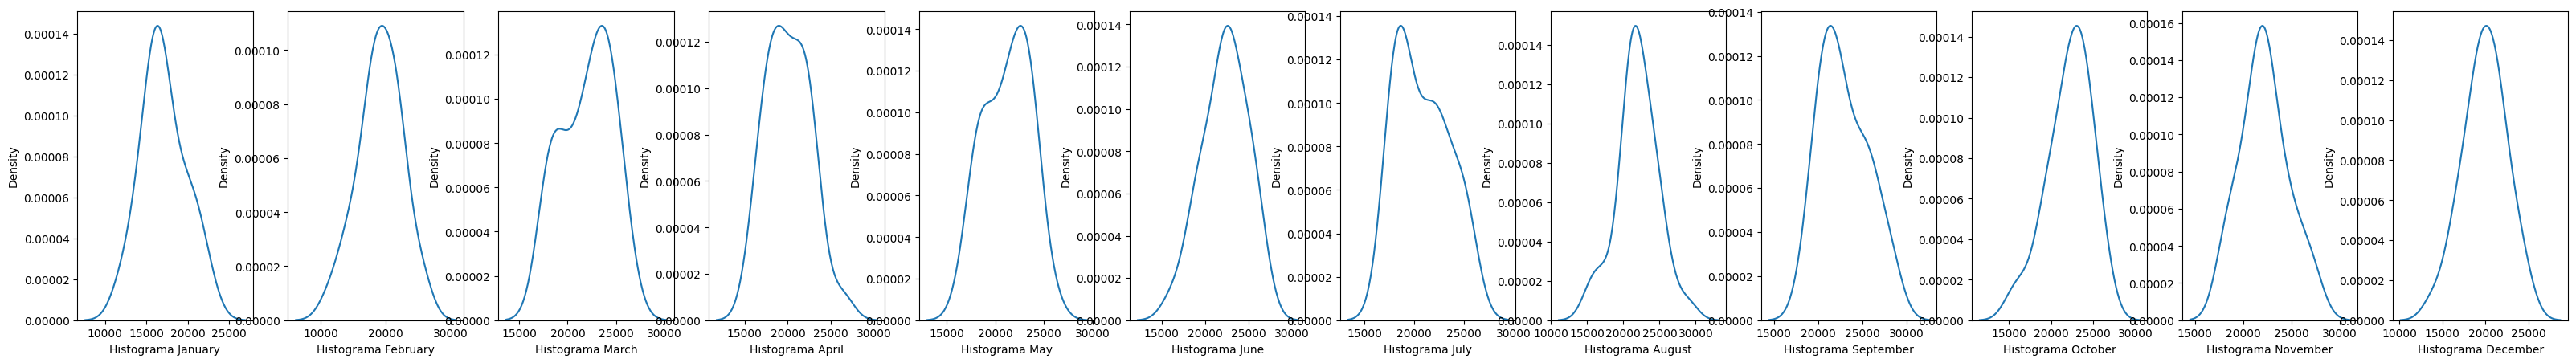

In [48]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

NUMBER_OF_MONTHS = 12

ci_empiric = {
    "month": [],
    "mean": [],
    "std_dev": [],
    "95%": [],
    "99.7%": []
}

df_by_month = []
df_santa_ana = df["Ventas Santa Ana"]

fig, axs = plt.subplots(nrows=1, ncols=NUMBER_OF_MONTHS)
for i in range(NUMBER_OF_MONTHS):
    month_data = df_santa_ana.iloc[df_santa_ana.index.month == i+1]
    ci_empiric["month"].append(calendar.month_name[i+1])
    month_mean = month_data.mean()
    month_std = month_data.std()
    ci_empiric["mean"].append(month_mean)
    ci_empiric["std_dev"].append(month_std)
    ci_empiric["95%"].append((month_mean - 2*month_std, month_mean + 2*month_std))
    ci_empiric["99.7%"].append((month_mean - 3*month_std, month_mean + 3*month_std))
    sns.kdeplot(data=month_data, ax=axs[i])
    axs[i].set_xlabel("Histograma " + calendar.month_name[i+1])
    df_by_month.append(month_data)

ci_empiric_df = pd.DataFrame.from_dict(ci_empiric)
display(ci_empiric_df)
fig.set_size_inches(40, 5)

2. Realicen pruebas ANOVA para determinar si las ventas esperadas de todas las tiendas son iguales o no,
con significancia del 95

In [25]:
from scipy import stats

stats.f_oneway(*df_by_month)

F_onewayResult(statistic=np.float64(12.05163033219513), pvalue=np.float64(2.9749262098506266e-19))

3. Identifiquen la tienda con mayor promedio de ventas y la tienda con menor promedio de ventas y realicen
una prueba de hipótesis para determinar si la diferencia entre ellas es distinta de cero o no.

In [65]:
df.describe()

,Ventas Santa Ana,Ventas Cordoba,Ventas La Floresta,Ventas Los Cedros,Ventas Palermo
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,20990.659056,17900.271075,21713.716026,18068.391082,20787.278462
std,3080.749475,2989.198032,3063.659636,3068.290166,2908.004697
min,11333.434400,9436.599034,12494.913740,10039.641500,11439.713420
25%,18759.655090,15935.841870,19667.310080,15862.198550,18908.726290
50%,21248.570810,18126.591290,22016.190500,18141.253410,20952.996530
75%,23010.314330,20085.310130,23748.501730,20342.445370,22908.781810
max,28860.143320,24259.714110,28467.553380,25496.299150,28256.625700


La hipótesis nula es que la diferencia entre las medias del supermercado con máximo promedio de ventas y el supermercado con mínimo promedio de ventas es 0
$$H_0: \mu_1 - \mu_2 = 0 \Rightarrow \mu_{\bar{x}_1 - \bar{x}_2}$$

Siendo $\alpha = 0.05$, de tabla, el valor crítico (Z-score) para una normal estándar es 1.65. 

In [75]:
import numpy as np

mean_sales = df.mean()
max_sales = mean_sales.idxmax()
min_sales = mean_sales.idxmin()

print(f"Max. sales: {max_sales} with mean {df[max_sales].mean()} and std dev {df[max_sales].std()}")
print(f"Min. sales: {min_sales} with mean {df[min_sales].mean()} and std dev {df[min_sales].std()}")
diff_means = df[max_sales].mean() - df[min_sales].mean()
print(f"The diff between means is {diff_means}")

alpha = 0.05 # significance
z_score = 1.65

std_diff_means = np.sqrt((df[max_sales].std()**2 / len(df[max_sales])) + (df[min_sales].std()**2 / len(df[min_sales])))
print(f"The diff of std dev is {std_diff_means}")

critical_diff_means = z_score * std_diff_means
print(f"There is only 5% probability that the diff between means is larger than {critical_diff_means}")

if diff_means > critical_diff_means:
    print(f"Null hypothesis rejected since {diff_means} > {critical_diff_means}")
else:
    print(f"Null hypothesis accepted since {diff_means} < {critical_diff_means}")

Max. sales: Ventas La Floresta with mean 21713.71602610959 and std dev 3063.659635741147
Min. sales: Ventas Cordoba with mean 17900.27107540274 and std dev 2989.198032286942
The diff between means is 3813.4449507068493
The diff of std dev is 224.0432641676554
There is only 5% probability that the diff between means is larger than 369.6713858766314
Null hypothesis rejected since 3813.4449507068493 > 369.6713858766314


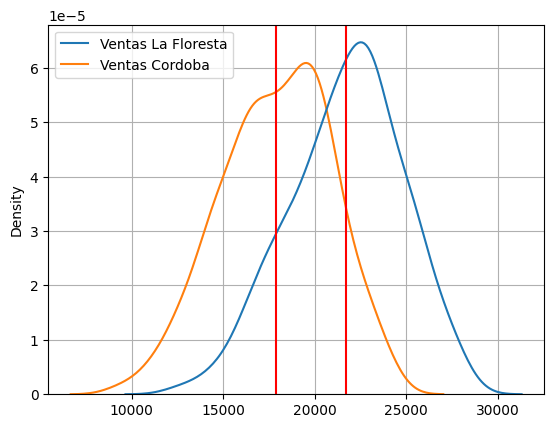

In [90]:
ax = plt.subplot()
sns.kdeplot(data=df[[max_sales, min_sales]], ax=ax)
ax.axvline(df[max_sales].mean(), color="r")
ax.axvline(df[min_sales].mean(), color="r")
ax.grid()